<a href="https://colab.research.google.com/github/slmnysf/Data-Mining-Kelompok-2/blob/main/Tugas_1_Data_Mining_Kelompok_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
#library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Input Data

In [2]:
#mengambil data dari github
rumah = pd.read_csv('https://raw.githubusercontent.com/slmnysf/Data-Mining-Kelompok-2/main/Tugas%2001%20Data%20Mining%20-%20Kelompok%202.csv')
#menampilkan data awal
rumah.head()

,No,Tgl_Iklan,url,harga,Kota,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,judul,deskripsi
0,1,28-03-2021,https://www.rumah.com/listing-properti/dijual-...,945000000,Bogor,145,110,4,2,0,0,1,0,1300,SHM,Rumah Murah di Bantar Jati Kota Bogor,DP SUKA SUKA RUMAH CANTIK TERAWAT LOKASI STRAT...
1,2,08-04-2021,https://www.rumah.com/listing-properti/dijual-...,2500000000,Bogor,180,160,3,2,0,0,2,0,2200,SHM,Rumah Perumahan purimas Bogor,Dijual rumah nyaman lokasi di kota Bogor Perum...
2,3,26-03-2021,https://www.rumah.com/listing-properti/dijual-...,7000000000,Bogor,365,154,4,4,1,1,1,1,4400,SHM,Rumah Di KOTA BOGOR,Rumah Lokasi di pusat kota Bogor.\nBelakang Ho...
3,4,30-03-2021,https://www.rumah.com/listing-properti/dijual-...,6500000000,Bogor,451,366,4,6,2,2,1,1,2200,SHM,Dijial Rumah mewah di kota bogor,Dijual Rumah mewah dalam perumahan ahmad yani ...
4,5,30-03-2021,https://www.rumah.com/listing-properti/dijual-...,800000000,Bogor,110,180,5,3,0,0,1,0,1300,SHGB,Dijual rumah 2 lantai di kota bogor,Dijual Rumah 2 lantai dalam cluster daerah cim...


In [3]:
#menampilkan data akhir
rumah.tail()

,No,Tgl_Iklan,url,harga,Kota,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,judul,deskripsi
95,96,01-04-2021,https://www.rumah.com/listing-properti/dijual-...,690000000,Bogor,60,60,3,2,0,0,1,0,2200,SHM,Green Forest Cifor Rumah Syariah Dengan Kawasa...,Kawasan Islamic Green Living Pertama dan Terbe...
96,97,01-04-2021,https://www.rumah.com/listing-properti/dijual-...,2795000000,Bogor,361,361,4,6,1,1,1,2,3500,SHM,Jual Cepat Rumah Di Perumahan Bogor Baru Bogor...,Jual Cepat Rumah Di Perumahan Bogor Baru Bogor...
97,98,01-04-2021,https://www.rumah.com/listing-properti/dijual-...,600000000,Bogor,90,48,2,2,0,0,1,0,2200,SHGB,Termurah LT 90 harga 600jt*\r\nRumah\r,Rumah Cantik Konsep Bali Mewah\r\nFirst In Bog...
98,99,01-04-2021,https://www.rumah.com/listing-properti/dijual-...,3500000000,Bogor,600,300,5,3,1,1,3,0,2200,SHM,Rumah Di Bantar Kemang Dekat BSI Cocok Buat Ka...,Jual Rumah Pinggir Jalan Cocok untuk Kantor\r\...
99,100,01-04-2021,https://www.rumah.com/listing-properti/dijual-...,393000000,Bogor,66,50,2,1,0,0,1,0,1300,SHM,Perumahan di cilebut bumi cahaya sakura dengan...,Rumah Konsep Jepang Tahan Gempa Dan Terjangaka...


In [4]:
#melihat jumlah baris dan kolom
rumah.shape

(100, 17)

# Drop Column

In [5]:
#melihat daftar kolom
rumah.columns

Index(['No', 'Tgl_Iklan', 'url', 'harga', 'Kota', 'LT', 'LB', 'KT', 'KM',
       'KTP', 'KMP', 'carport', 'garasi', 'listrik', 'surat', 'judul',
       'deskripsi'],
      dtype='object')

In [6]:
#menghilangkan kolom yang tidak digunakan
rumah.drop(['No','Tgl_Iklan','url','Kota','judul','deskripsi'], axis=1, inplace=True)
rumah.head()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
0,945000000,145,110,4,2,0,0,1,0,1300,SHM
1,2500000000,180,160,3,2,0,0,2,0,2200,SHM
2,7000000000,365,154,4,4,1,1,1,1,4400,SHM
3,6500000000,451,366,4,6,2,2,1,1,2200,SHM
4,800000000,110,180,5,3,0,0,1,0,1300,SHGB


# Ubah Tipe Data

In [7]:
#menampilkan info data
rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   harga    100 non-null    int64 
 1   LT       100 non-null    int64 
 2   LB       100 non-null    int64 
 3   KT       100 non-null    int64 
 4   KM       100 non-null    int64 
 5   KTP      100 non-null    int64 
 6   KMP      100 non-null    int64 
 7   carport  100 non-null    int64 
 8   garasi   100 non-null    int64 
 9   listrik  100 non-null    int64 
 10  surat    100 non-null    object
dtypes: int64(10), object(1)
memory usage: 8.7+ KB


In [8]:
#merubah tipe data
rumah['surat'] = rumah['surat'].astype('category')
rumah['listrik']= rumah['listrik'].astype('category')
#mengecek type data
rumah.dtypes

harga         int64
LT            int64
LB            int64
KT            int64
KM            int64
KTP           int64
KMP           int64
carport       int64
garasi        int64
listrik    category
surat      category
dtype: object

In [9]:
#mengelompokkan data numerik
rumah_num = rumah.select_dtypes(include = ['float64', 'int64'])
rumah_num.head()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi
0,945000000,145,110,4,2,0,0,1,0
1,2500000000,180,160,3,2,0,0,2,0
2,7000000000,365,154,4,4,1,1,1,1
3,6500000000,451,366,4,6,2,2,1,1
4,800000000,110,180,5,3,0,0,1,0


In [10]:
#mengelompokkan data kategorik
rumah_cat = rumah.select_dtypes(include = ['category'])
rumah_cat.head()

,listrik,surat
0,1300,SHM
1,2200,SHM
2,4400,SHM
3,2200,SHM
4,1300,SHGB


# Cek Duplikasi

In [11]:
#mengecek data duplikasi
rumah.duplicated().sum()

0

# Dummy Variable

In [12]:
#membuat data kategorik surat menjadi kolom terpisah
dummy1 = pd.get_dummies(rumah['surat'], prefix='surat')
dummy1.head()

,surat_SHGB,surat_SHM
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [13]:
#membuat data kategorik listrik menjadi kolom terpisah
dummy2 = pd.get_dummies(rumah['listrik'], prefix='daya')
dummy2.head()

,daya_1300,daya_2200,daya_3500,daya_4400,daya_6600,daya_9500
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [14]:
#menggabungkan dataset rumah, dummy1 dan dummy2
df = pd.concat([rumah, dummy1, dummy2], axis = 1)
df.head().transpose()

,0,1,2,3,4
harga,945000000,2500000000,7000000000,6500000000,800000000
LT,145,180,365,451,110
LB,110,160,154,366,180
KT,4,3,4,4,5
KM,2,2,4,6,3
KTP,0,0,1,2,0
KMP,0,0,1,2,0
carport,1,2,1,1,1
garasi,0,0,1,1,0
listrik,1300,2200,4400,2200,1300


# Handling Outliers

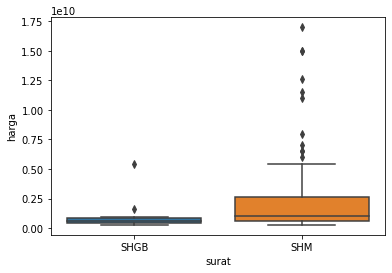

In [15]:
p = sns.boxplot(x="surat", y="harga", data=rumah)

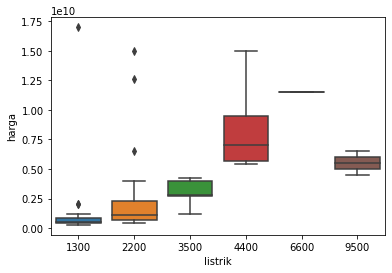

In [16]:
p = sns.boxplot(x="listrik", y="harga", data=rumah)

In [17]:
#mencari data outlier
from numpy import quantile
def outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] <= fence_low) | (df_in[col_name] >= fence_high)]
    return df_out

In [18]:
outlier(rumah,'harga')

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
2,7000000000,365,154,4,4,1,1,1,1,4400,SHM
3,6500000000,451,366,4,6,2,2,1,1,2200,SHM
8,6000000000,724,350,4,2,0,0,3,0,4400,SHM
35,6500000000,452,366,5,5,1,1,1,2,9500,SHM
48,15000000000,1353,500,4,3,0,0,10,0,4400,SHM
52,17000000000,1527,500,3,2,0,0,6,0,1300,SHM
53,12584850000,4729,300,6,3,2,1,4,2,2200,SHM
55,8000000000,1000,400,8,4,0,0,7,0,4400,SHM
62,15000000000,880,432,4,2,0,0,0,0,2200,SHM
84,11000000000,580,700,7,6,2,1,2,2,4400,SHM


In [19]:
#mencari data tanpa outlier
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [20]:
remove_outlier(rumah,'harga')

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
0,945000000,145,110,4,2,0,0,1,0,1300,SHM
1,2500000000,180,160,3,2,0,0,2,0,2200,SHM
4,800000000,110,180,5,3,0,0,1,0,1300,SHGB
5,450000000,72,42,2,1,0,0,1,0,1300,SHM
6,451250000,84,36,2,1,0,0,1,0,1300,SHGB
...,...,...,...,...,...,...,...,...,...,...,...
95,690000000,60,60,3,2,0,0,1,0,2200,SHM
96,2795000000,361,361,4,6,1,1,1,2,3500,SHM
97,600000000,90,48,2,2,0,0,1,0,2200,SHGB
98,3500000000,600,300,5,3,1,1,3,0,2200,SHM


In [21]:
#memasukkan data outlier dan bukan outlier kedalam variabel
rumah2=remove_outlier(rumah,'harga').reset_index()
rumah3=outlier(rumah,'harga').reset_index()

In [22]:
#mengecek nilai maksimum pada data tanpa oulier
rumah2['harga'].max()

5400000000

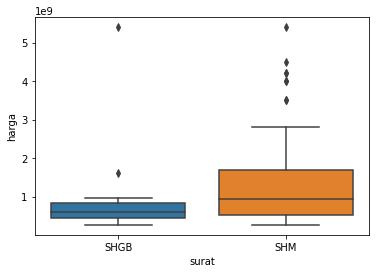

In [23]:
#visualisasi boxplot setelah memisahkan outliers
p= sns.boxplot(x="surat", y="harga", data=rumah2)

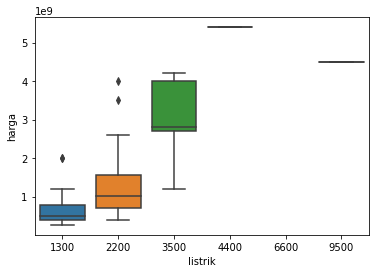

In [24]:
#visualisasi boxplot setelah memisahkan outliers
p= sns.boxplot(x="listrik", y="harga", data=rumah2)

# Cek Missing Values

In [25]:
#mengecek missing values
rumah2.isnull().sum()

index      0
harga      0
LT         0
LB         0
KT         0
KM         0
KTP        0
KMP        0
carport    0
garasi     0
listrik    0
surat      0
dtype: int64

# Statistika Deskriptif

In [26]:
#menampilkan deskripsi statistik data numerik
rumah2.describe()

,index,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi
count,89.000000,8.900000e+01,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,50.134831,1.341523e+09,158.370787,128.247191,3.067416,2.112360,0.213483,0.123596,1.483146,0.247191
std,29.039233,1.214633e+09,127.252021,122.805304,1.204138,1.210167,0.487850,0.363700,1.216481,0.695454
min,0.000000,2.650000e+08,29.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,5.000000e+08,72.000000,45.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49.000000,8.750000e+08,96.000000,72.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000
75%,75.000000,1.500000e+09,192.000000,180.000000,4.000000,3.000000,0.000000,0.000000,2.000000,0.000000
max,99.000000,5.400000e+09,600.000000,600.000000,7.000000,6.000000,2.000000,2.000000,9.000000,4.000000


In [27]:
#menampilkan deskripsi statistik data keseluruhan
rumah2.describe(include='all')

,index,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
count,89.000000,8.900000e+01,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.0,89
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2200.0,SHM
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,77
mean,50.134831,1.341523e+09,158.370787,128.247191,3.067416,2.112360,0.213483,0.123596,1.483146,0.247191,NaN,NaN
std,29.039233,1.214633e+09,127.252021,122.805304,1.204138,1.210167,0.487850,0.363700,1.216481,0.695454,NaN,NaN
min,0.000000,2.650000e+08,29.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,25.000000,5.000000e+08,72.000000,45.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN
50%,49.000000,8.750000e+08,96.000000,72.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN
75%,75.000000,1.500000e+09,192.000000,180.000000,4.000000,3.000000,0.000000,0.000000,2.000000,0.000000,NaN,NaN


In [28]:
#mengecek jumlah values pada tiap kategori surat
rumah2['surat'].value_counts()

SHM     77
SHGB    12
Name: surat, dtype: int64

In [29]:
#mengecek jumlah values pada tiap kategori listrik
rumah2['listrik'].value_counts()

2200    39
1300    38
3500     9
4400     2
9500     1
6600     0
Name: listrik, dtype: int64

# Cek Korelasi

In [30]:
#mengecek korelasi antar variabel
rumah2.corr()

,index,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi
index,1.000000,0.161742,0.222702,0.176676,0.149228,0.199077,0.178425,0.206061,0.066975,0.154194
harga,0.161742,1.000000,0.761052,0.782518,0.617035,0.756963,0.562009,0.478153,0.457646,0.305056
LT,0.222702,0.761052,1.000000,0.742660,0.703179,0.609319,0.567442,0.522965,0.461010,0.523489
LB,0.176676,0.782518,0.742660,1.000000,0.780723,0.813154,0.724053,0.574050,0.331755,0.384338
KT,0.149228,0.617035,0.703179,0.780723,1.000000,0.727776,0.536208,0.421867,0.349883,0.400537
KM,0.199077,0.756963,0.609319,0.813154,0.727776,1.000000,0.671084,0.510275,0.271469,0.358187
KTP,0.178425,0.562009,0.567442,0.724053,0.536208,0.671084,1.000000,0.746236,0.226335,0.345097
KMP,0.206061,0.478153,0.522965,0.574050,0.421867,0.510275,0.746236,1.000000,0.171710,0.237254
carport,0.066975,0.457646,0.461010,0.331755,0.349883,0.271469,0.226335,0.171710,1.000000,-0.303957
garasi,0.154194,0.305056,0.523489,0.384338,0.400537,0.358187,0.345097,0.237254,-0.303957,1.000000


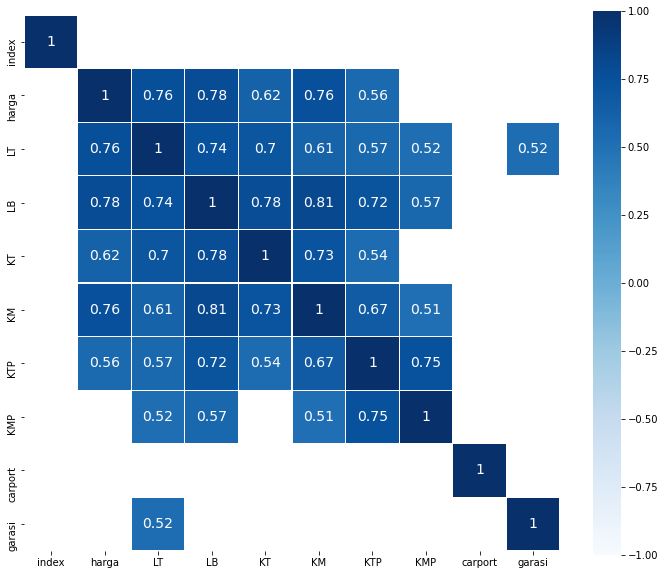

In [31]:
#menampilkan korelasi yang memiliki hubungan kuat pada data tanpa oulier
corr = rumah2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='Blues', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

Berdasarkan visualisasi heatmap diatas, dapat dilihat bahwa variabel harga memiliki korelasi yang cukup kuat dengan luas bangunan (0.78), luas tanah (0.76, jumlah kamar mandi (0.76), jumlah kamar tidur (0.62), dan jumlah kamar tidur pembantu (0.56).

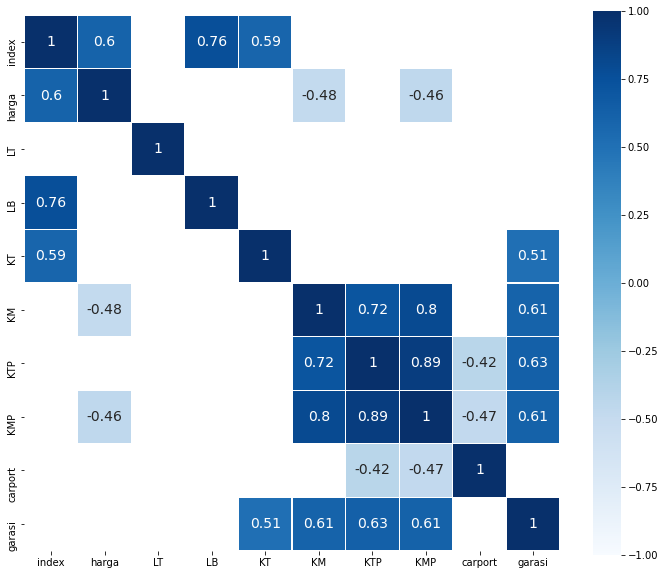

In [32]:
#menampilkan korelasi yang memiliki hubungan kuat pada data oulier
corr = rumah3.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='Blues', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

Berdasarkan visualisasi heatmap diatas, dapat dilihat bahwa variabel harga pada data outlier tidak memiliki korelasi yang cukup kuat dengan variabel lainnya.

# Visualisasi

Visualisasi dilakukan pada variabel yang memiliki korelasi yang kuat dengan 
variabel harga (>=5)

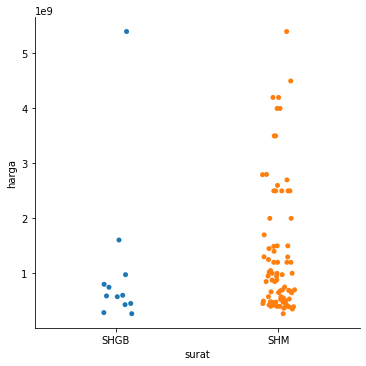

In [33]:
p= sns.catplot(x="surat", y="harga", data=rumah2)

Jika diasumsikan luas tanah dan variable lainnya itu sama, maka sepertinya jenis surat kepemilikan SHGB memiliki harga yang relatif lebih rendah. Sedangkan, jenis surat kepemilikan SHM memiliki harga yang lebih bervariasi.

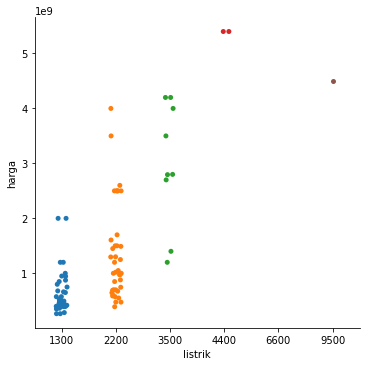

In [34]:
p= sns.catplot(x="listrik", y="harga", data=rumah2)

Jika diasumsikan luas tanah dan variable lainnya itu sama, maka sepertinya semakin kecil kategori daya listriknya, maka harga rumah akan relatif lebih rendah.

In [35]:
fig = px.scatter(rumah2,x='LT', y='harga',labels={
                     "harga": "harga rumah(milyar)",
                     "LT": "Luas Tanah(meter persegi)",
                 },
                title="Tabel Hubungan Harga rumah dengan Luas Tanahnya")
fig.show()

Jika diasumsikan luas bangunan dan variable lainnya itu sama, maka sepertinya luas tanah mempengaruhi harga rumah, tetapi pengaruhnya tidak terlalu signifikan.

In [36]:
fig = px.scatter(rumah2,x='LB', y='harga',labels={
                     "harga": "harga rumah(milyar)",
                     "LB": "Luas Bangunan(meter persegi)",
                 },
                title="Tabel Hubungan Harga rumah dengan Luas Bangunannya")
fig.show()

Jika diasumsikan luas tanah dan variable lainnya itu sama, maka sepertinya luas bangunan merupakan variabel yang paling mempengaruhi harga, tetapi luas bangunan tidak dapat dijadikan acuan tunggal dalam penentuan harga.

In [37]:
fig = px.scatter(rumah2,x='KT', y='harga',labels={
                     "harga": "harga rumah(milyar)",
                     "KT": "Kamar Tidur",
                 },
                title="Tabel Hubungan Harga rumah dengan Jumlah Kamar Tidur")
fig.show()

Berdasarkan visualisasi tersebut, dapat diasumsikan bahwa rumah pada umumnya memiliki 2-5 kamar, hanya sedikit rumah yang memiliki kamar lebih dari 5. Dan jika dilihat dari rumah yang memiliki 2-5 kamar, maka semakin banyak jumlah kamar, harga pun akan relatif lebih tinggi.

In [38]:
fig = px.scatter(rumah2,x='KM', y='harga',labels={
                     "harga": "harga rumah(milyar)",
                     "KM": "Kamar Mandi",
                 },
                title="Tabel Hubungan Harga rumah dengan Jumlah Kamar Mandi")
fig.show()

Berdasarkan visualisasi tersebut, dapat diasumsikan bahwa rumah pada umumnya memiliki 1-5 kamar mandi, hanya sedikit rumah yang memiliki kamar mandi lebih dari 5. Dan jika dilihat dari rumah yang memiliki 1-5 kamar mandi, maka semakin banyak jumlah kamar mandi, harga pun akan relatif lebih tinggi.

In [39]:
fig = px.scatter(rumah2,x='KTP', y='harga',labels={
                     "harga": "harga rumah(milyar)",
                     "KTP": "Kamar Tidur Pembantu",
                 },
                title="Tabel Hubungan Harga rumah dengan Jumlah Kamar Tidur Pembantu")
fig.show()

Berdasarkan visualisasi tersebut, dapat diasumsikan bahwa kebanyakan rumah tidak memiliki kamar tidur pembantu. hanya rumah dengan harga yang relatif tinggi (lebih dari 1 milyar) yang memiliki kamar tidur pembantu.

# Clustering

In [40]:
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

Requirement already up-to-date: umap-learn in /usr/local/lib/python3.7/dist-packages (0.5.1)
--2021-04-16 17:06:33--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.1’

tau_unsup.py.1      100%[===================>]  16.98K  --.-KB/s    in 0s      

2021-04-16 17:06:33 (38.6 MB/s) - ‘tau_unsup.py.1’ saved [17387/17387]



## import libraries

In [41]:
import warnings; warnings.simplefilter('ignore')
import umap, tau_unsup as tau
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

sns.set(style="ticks", color_codes=True)

## visualisasi pengelompokan data berdasarkan kategori surat dan listrik

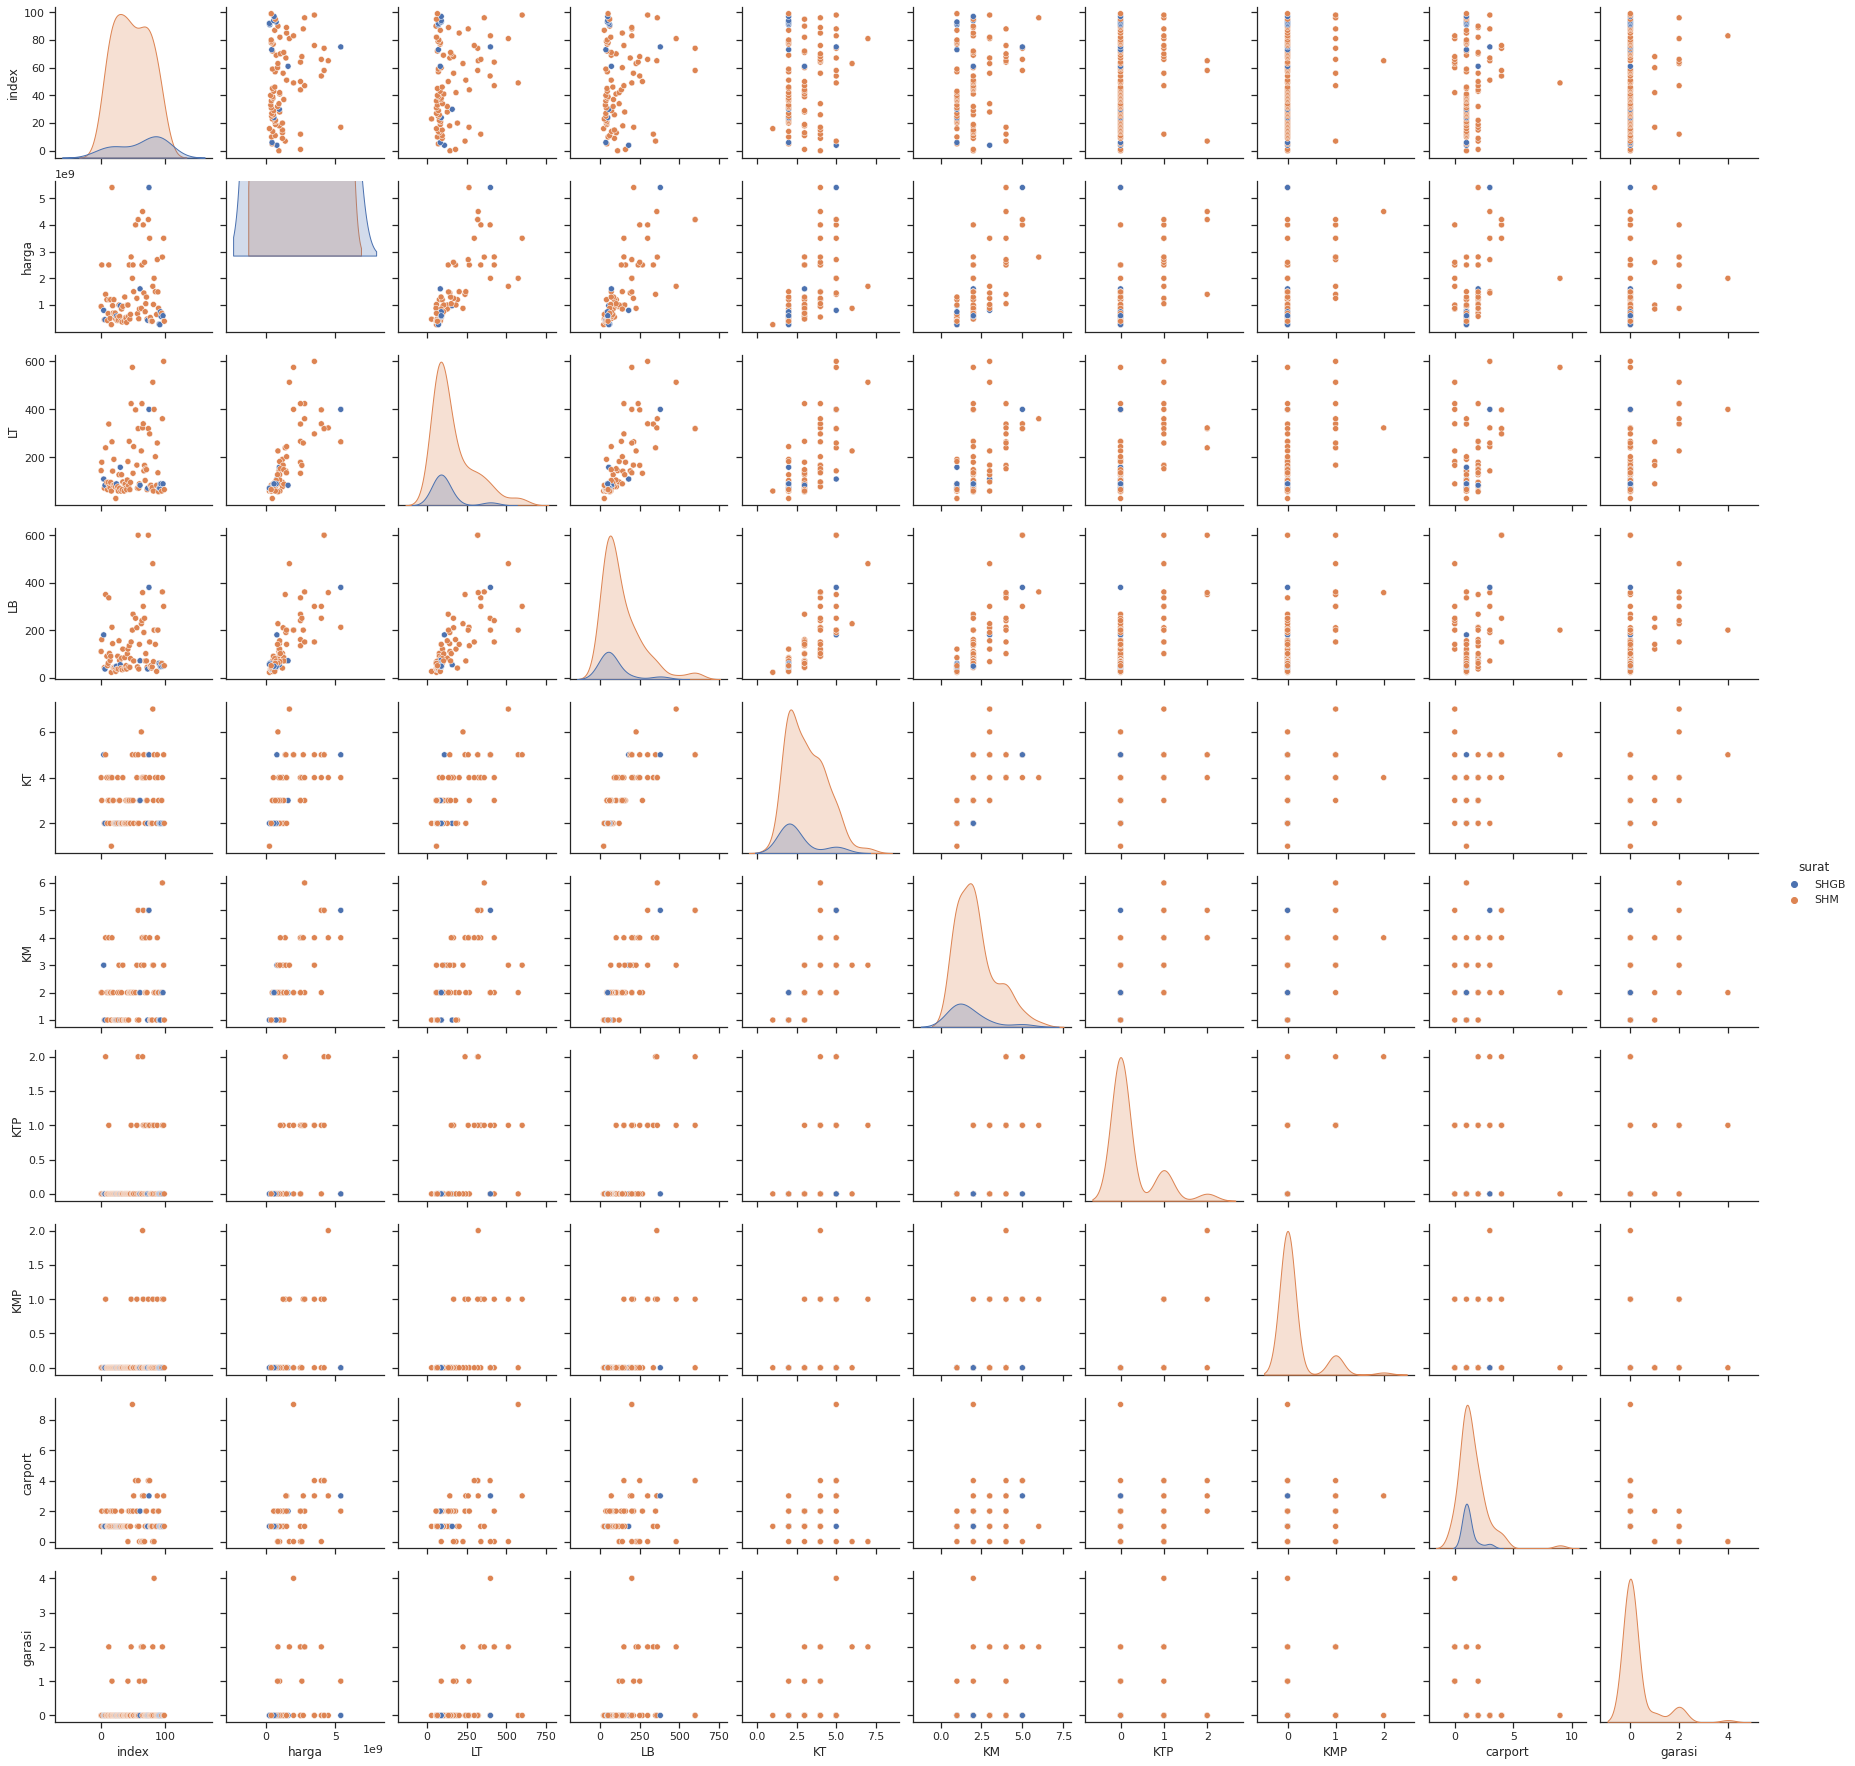

In [42]:
sns.pairplot(rumah2,hue='surat');

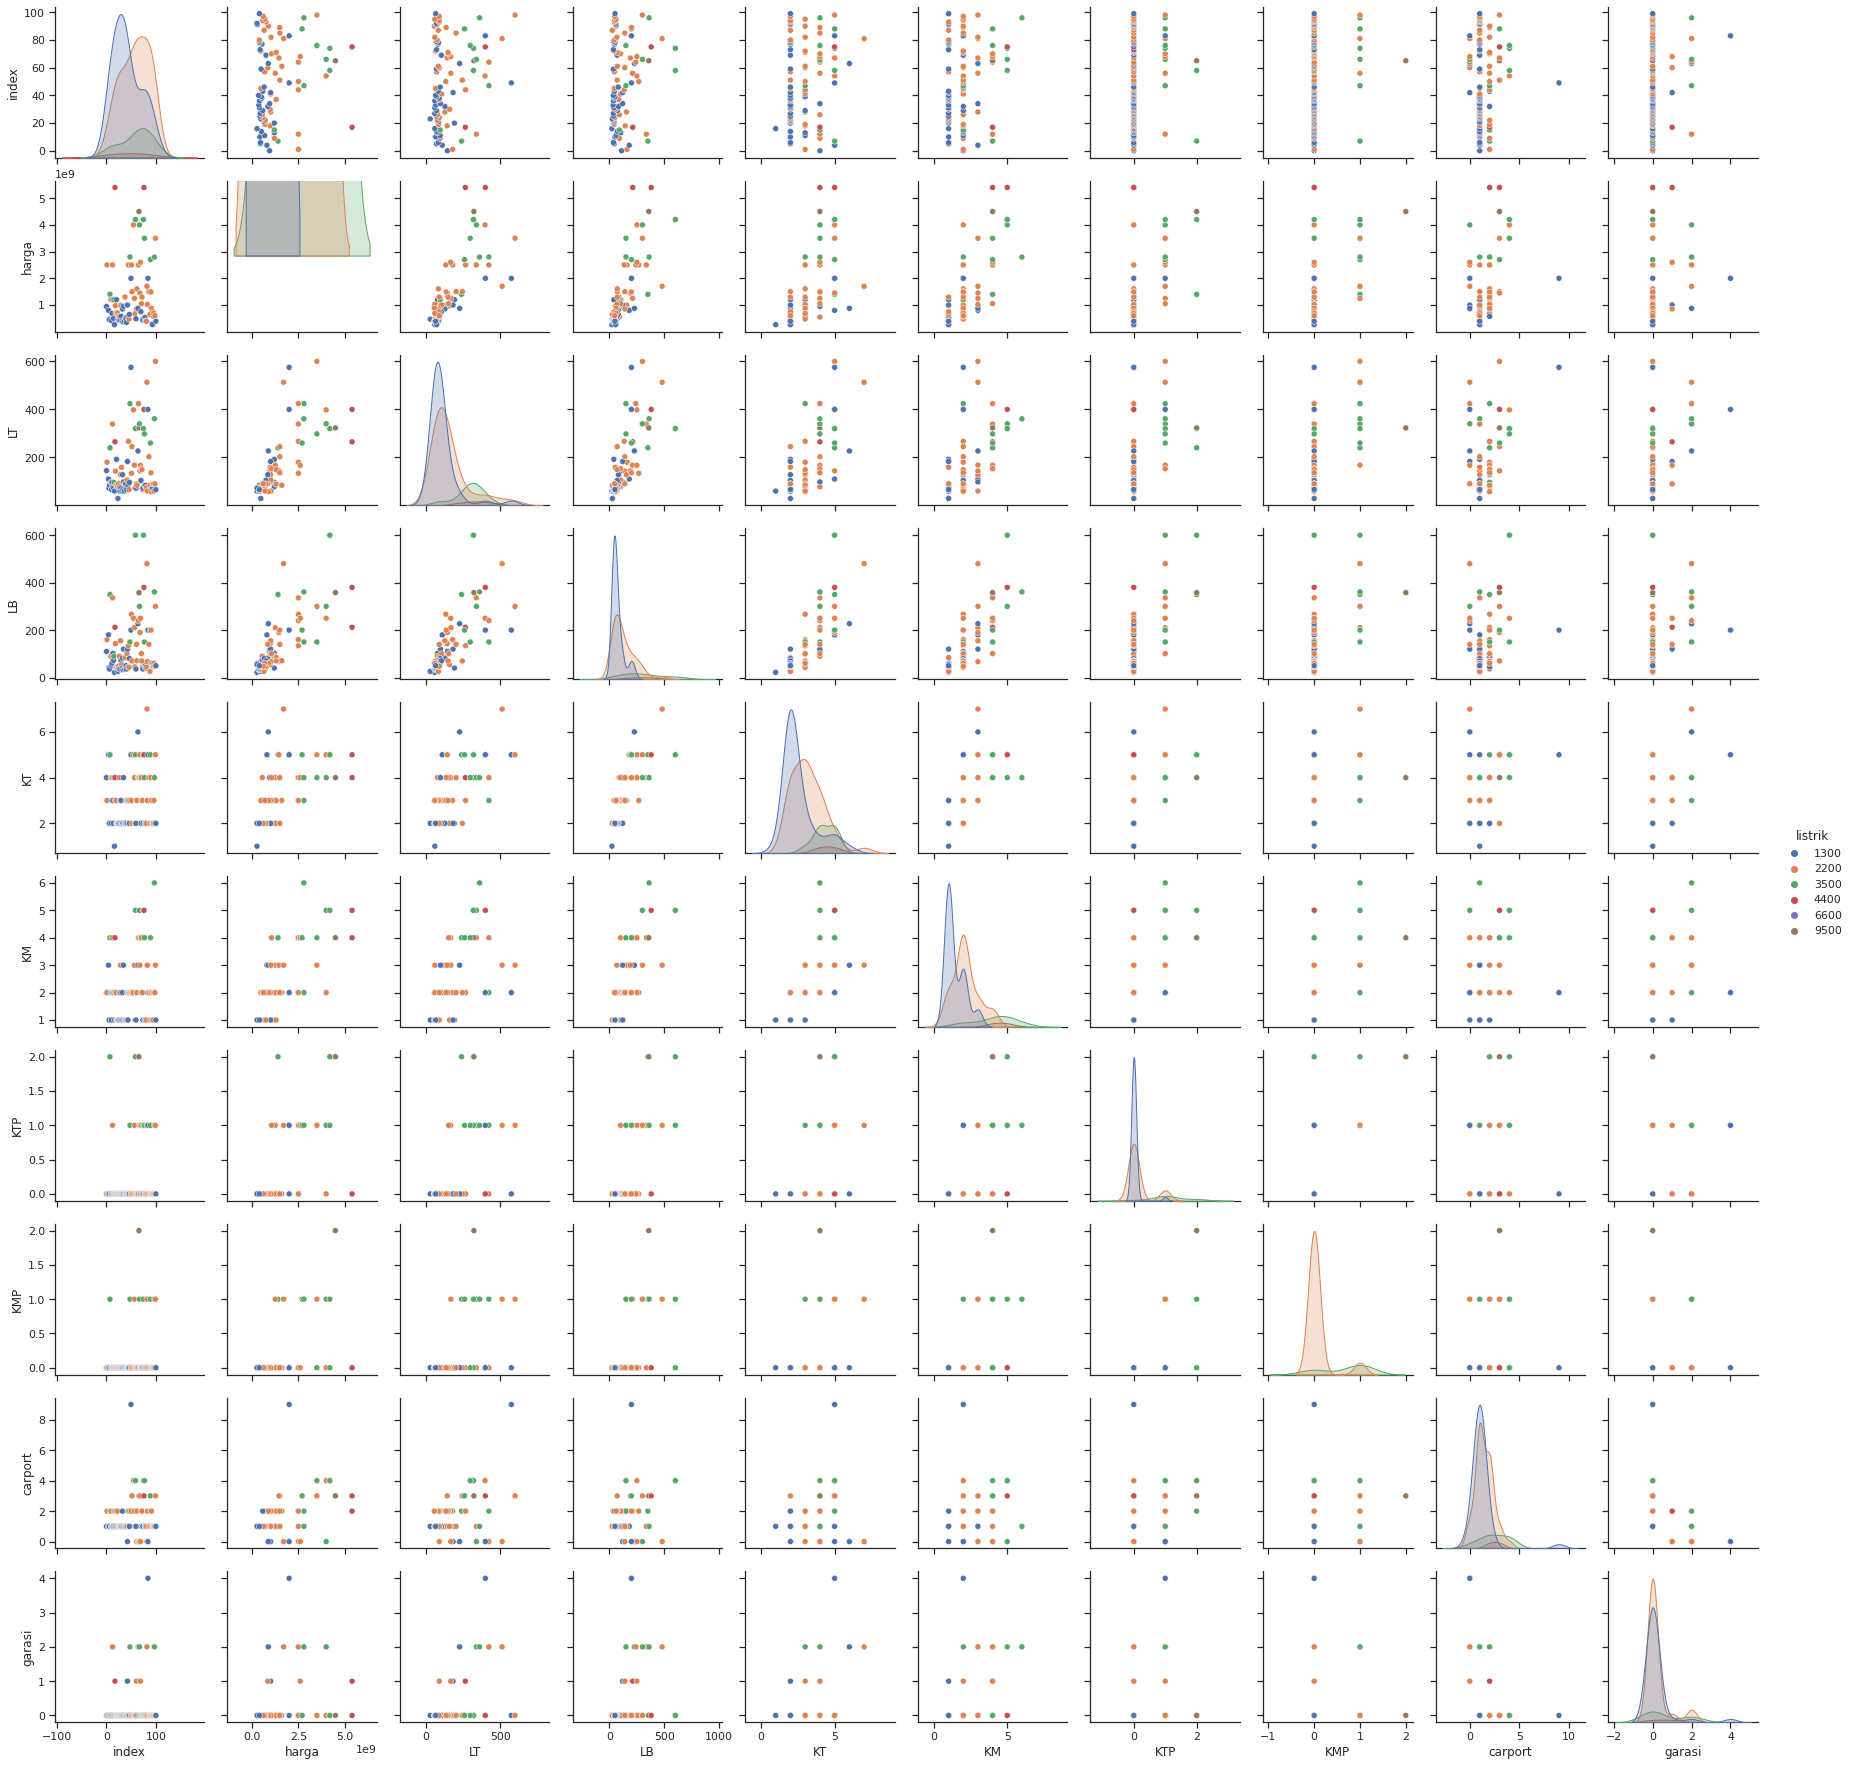

In [43]:
sns.pairplot(rumah2,hue='listrik');

## Normalisasi

In [44]:
rumah2.columns

Index(['index', 'harga', 'LT', 'LB', 'KT', 'KM', 'KTP', 'KMP', 'carport',
       'garasi', 'listrik', 'surat'],
      dtype='object')

In [45]:
#Mengubah dataframe menjadi array
c_data = np.array(rumah2.iloc[:,1:-2])
c_data[:5]

array([[ 945000000,        145,        110,          4,          2,
                 0,          0,          1,          0],
       [2500000000,        180,        160,          3,          2,
                 0,          0,          2,          0],
       [ 800000000,        110,        180,          5,          3,
                 0,          0,          1,          0],
       [ 450000000,         72,         42,          2,          1,
                 0,          0,          1,          0],
       [ 451250000,         84,         36,          2,          1,
                 0,          0,          1,          0]])

In [46]:
#Scaling data menggunakan MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
c_scaled = mm.fit_transform(c_data)
c_scaled[:5]

array([[0.13242454, 0.20315236, 0.15224913, 0.5       , 0.2       ,
        0.        , 0.        , 0.11111111, 0.        ],
       [0.4352483 , 0.26444834, 0.23875433, 0.33333333, 0.2       ,
        0.        , 0.        , 0.22222222, 0.        ],
       [0.10418695, 0.14185639, 0.2733564 , 0.66666667, 0.4       ,
        0.        , 0.        , 0.11111111, 0.        ],
       [0.03602726, 0.07530648, 0.03460208, 0.16666667, 0.        ,
        0.        , 0.        , 0.11111111, 0.        ],
       [0.03627069, 0.09632224, 0.02422145, 0.16666667, 0.        ,
        0.        , 0.        , 0.11111111, 0.        ]])

In [47]:
#Mengubah array menjadi dataframe
c_scaled = pd.DataFrame(c_scaled)
c_scaled.head()

,0,1,2,3,4,5,6,7,8
0,0.132425,0.203152,0.152249,0.500000,0.2,0.0,0.0,0.111111,0.0
1,0.435248,0.264448,0.238754,0.333333,0.2,0.0,0.0,0.222222,0.0
2,0.104187,0.141856,0.273356,0.666667,0.4,0.0,0.0,0.111111,0.0
3,0.036027,0.075306,0.034602,0.166667,0.0,0.0,0.0,0.111111,0.0
4,0.036271,0.096322,0.024221,0.166667,0.0,0.0,0.0,0.111111,0.0


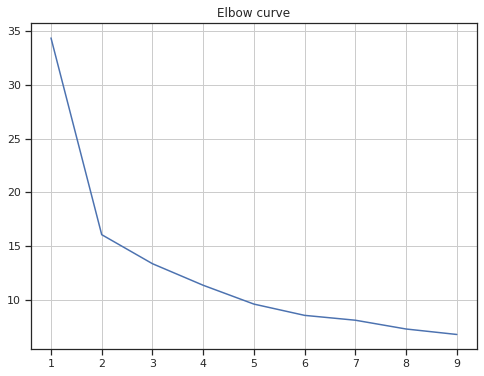

In [48]:
#Menggunakan Elbow Method untuk menentukan banyaknya cluster
distorsions, k1, kN = [], 1, 10
for k in range(k1, kN):
    kmeans = KMeans(n_clusters=k).fit(c_scaled)
    distorsions.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve');

Menurut Elbow Method jumlah cluster adalah 2

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0], dtype=int32)

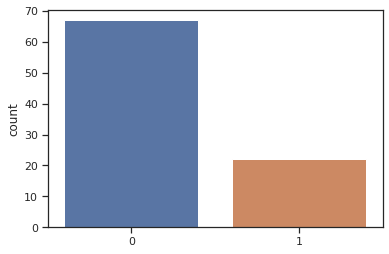

In [49]:
# Menggunakan 2 cluster
kmp2 = KMeans(n_clusters=2, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 42)
kmp2.fit(c_scaled)
C_kmp2 = kmp2.predict(c_scaled)

sns.countplot(C_kmp2);
kmp2.labels_

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1,
       2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0], dtype=int32)

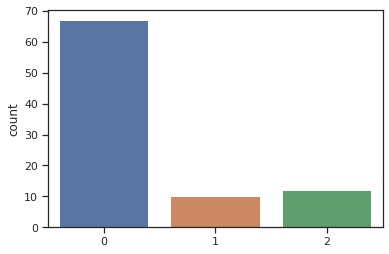

In [50]:
# Menggunakan 3 cluster
kmp3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 42)
kmp3.fit(c_scaled)
C_kmp3 = kmp3.predict(c_scaled)

sns.countplot(C_kmp3);
kmp3.labels_

array([0, 0, 0, 3, 3, 1, 0, 3, 3, 2, 0, 3, 0, 3, 2, 0, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 2,
       2, 0, 0, 2, 0, 3, 1, 3, 0, 0, 0, 2, 1, 1, 0, 2, 3, 0, 0, 3, 3, 1,
       2, 2, 3, 3, 3, 3, 1, 0, 2, 0, 3, 1, 0, 3, 3, 3, 3, 3, 3, 1, 3, 1,
       3], dtype=int32)

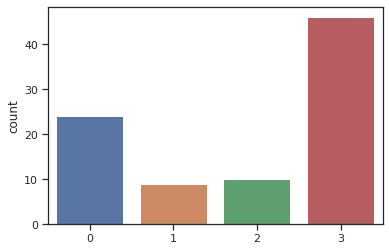

In [51]:
# Menggunakan 4 cluster
kmp4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 42)
kmp4.fit(c_scaled)
C_kmp4 = kmp4.predict(c_scaled)

sns.countplot(C_kmp4);
kmp4.labels_

array([0, 0, 0, 3, 3, 1, 0, 3, 3, 4, 0, 3, 0, 3, 2, 0, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 4,
       2, 0, 0, 2, 0, 3, 1, 3, 0, 0, 4, 4, 1, 1, 0, 4, 3, 0, 0, 3, 3, 1,
       2, 2, 3, 3, 3, 3, 4, 0, 4, 0, 3, 1, 0, 3, 3, 3, 3, 3, 3, 1, 3, 1,
       3], dtype=int32)

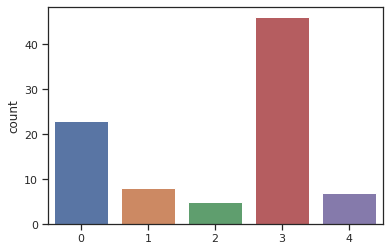

In [52]:
# Menggunakan 5 cluster
kmp5 = KMeans(n_clusters=5, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 42)
kmp5.fit(c_scaled)
C_kmp5 = kmp5.predict(c_scaled)

sns.countplot(C_kmp5);
kmp5.labels_

## Membentuk spherical

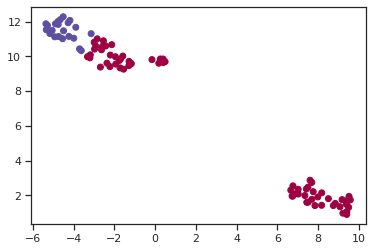

In [53]:
X2D = umap.UMAP(n_neighbors=11, random_state=42).fit_transform(c_scaled)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmp2, cmap='Spectral');

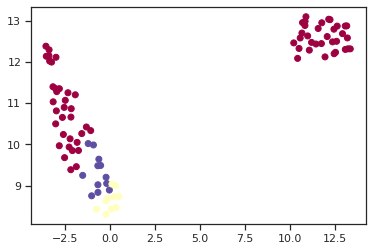

In [54]:
X2D = umap.UMAP(random_state=42).fit_transform(c_scaled)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmp3, cmap='Spectral');

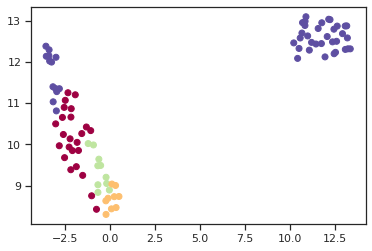

In [55]:
X2D = umap.UMAP(random_state=42).fit_transform(c_scaled)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmp4, cmap='Spectral');

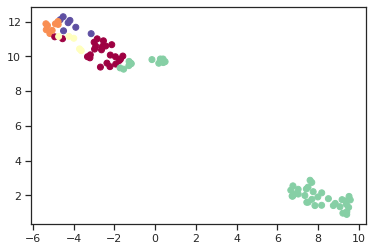

In [56]:
X2D = umap.UMAP(n_neighbors=11, random_state=42).fit_transform(c_scaled)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmp5, cmap='Spectral');

## Membandingkan hasil clustering

In [57]:
Hasil_Clustering = [C_kmp2, C_kmp3, C_kmp4, C_kmp5]
for res in Hasil_Clustering:
    print(siluet(c_scaled,res), end=', ')

0.6027714735900525, 0.5644706046979193, 0.3768828999022888, 0.3842297978485469, 

Meskipun memiliki nilai silhouette terendah, visualisasi spherical 5 cluster menunjukkan visualisasi yang lebih baik.

## Melihat letak centroid

In [58]:
kmp5.cluster_centers_

array([[ 2.05221893e-01,  1.84573213e-01,  1.87603430e-01,
         4.20289855e-01,  2.69565217e-01,  4.34782609e-02,
         2.17391304e-02,  1.78743961e-01,  1.08695652e-02],
       [ 6.12828627e-01,  5.54290718e-01,  6.25648789e-01,
         6.04166667e-01,  7.00000000e-01,  6.87500000e-01,
         5.00000000e-01,  2.77777778e-01,  1.25000000e-01],
       [ 7.39045764e-01,  6.27320490e-01,  3.74394464e-01,
         6.00000000e-01,  4.80000000e-01,  1.00000000e-01,
         0.00000000e+00,  4.88888889e-01,  5.00000000e-02],
       [ 6.05514373e-02,  9.42663519e-02,  4.73145780e-02,
         1.92028986e-01,  5.65217391e-02, -6.93889390e-17,
        -3.46944695e-17,  1.20772947e-01,  5.43478261e-03],
       [ 3.65002087e-01,  5.73179885e-01,  4.27335640e-01,
         6.19047619e-01,  4.28571429e-01,  3.57142857e-01,
         1.42857143e-01,  4.76190476e-02,  5.35714286e-01]])

## Mencari insight dari clustering

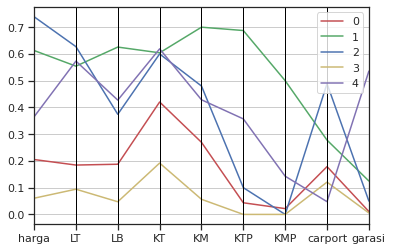

In [59]:
cols = ['harga','LT','LB','KT','KM','KTP','KMP','carport','garasi']
dfC = pd.DataFrame(kmp5.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b', 'y', 'm'))
plt.show()

Cluster 0:
- Dengan harga yang relatif rendah, mendapatkan kamar tidur yang relatif banyak dan memiliki carport.

Cluster 1:
- Dengan harga yang relatif tinggi, mendapatkan fasilitas sesuai dengan harga yang dibayarkan seperti jumlah kamar tidur dan kamar mandi yang banyak serta memiliki kamar tidur pembantu dan kamar mandi pembantu. Namun, carport dan garasi relatif sedikit sampai tidak ada.

Cluster 2:
- Dengan harga yang termasuk golongan tertinggi, mendapatkan carport dengan jumlah yang relatif terbanyak.

Cluster 3:
- Dengan harga yang relatif terendah, mendapatkan segala fasilitas yang cenderung lebih sedikit dibanding yang lain.

Cluster 4:
- Dengan harga yang relatif menengah, mendapatkan fasilitas yang terbaik seperti luas tanah, kamar tidur, dan garasi yang relatif tinggi.

## Pelabelan

In [60]:
rumah2['cluster'] = kmp5.labels_
rumah2.head(90)
pd.options.display.max_rows=100
rumah2.sort_values(by=['cluster','harga'])

,index,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,cluster
23,26,550000000,78,90,4,2,0,0,1,0,2200,SHM,0
2,4,800000000,110,180,5,3,0,0,1,0,1300,SHGB,0
52,60,850000000,90,140,3,2,0,0,0,1,2200,SHM,0
0,0,945000000,145,110,4,2,0,0,1,0,1300,SHM,0
31,34,950000000,98,120,4,3,0,0,1,0,1300,SHM,0
15,18,975000000,143,143,3,2,0,0,1,0,2200,SHM,0
25,28,1000000000,128,155,3,3,0,0,1,0,2200,SHM,0
37,41,1000000000,106,100,3,2,0,0,1,0,2200,SHM,0
73,82,1020000000,60,67,3,3,0,0,2,0,2200,SHM,0
61,70,1050000000,153,101,4,4,1,0,2,0,2200,SHM,0


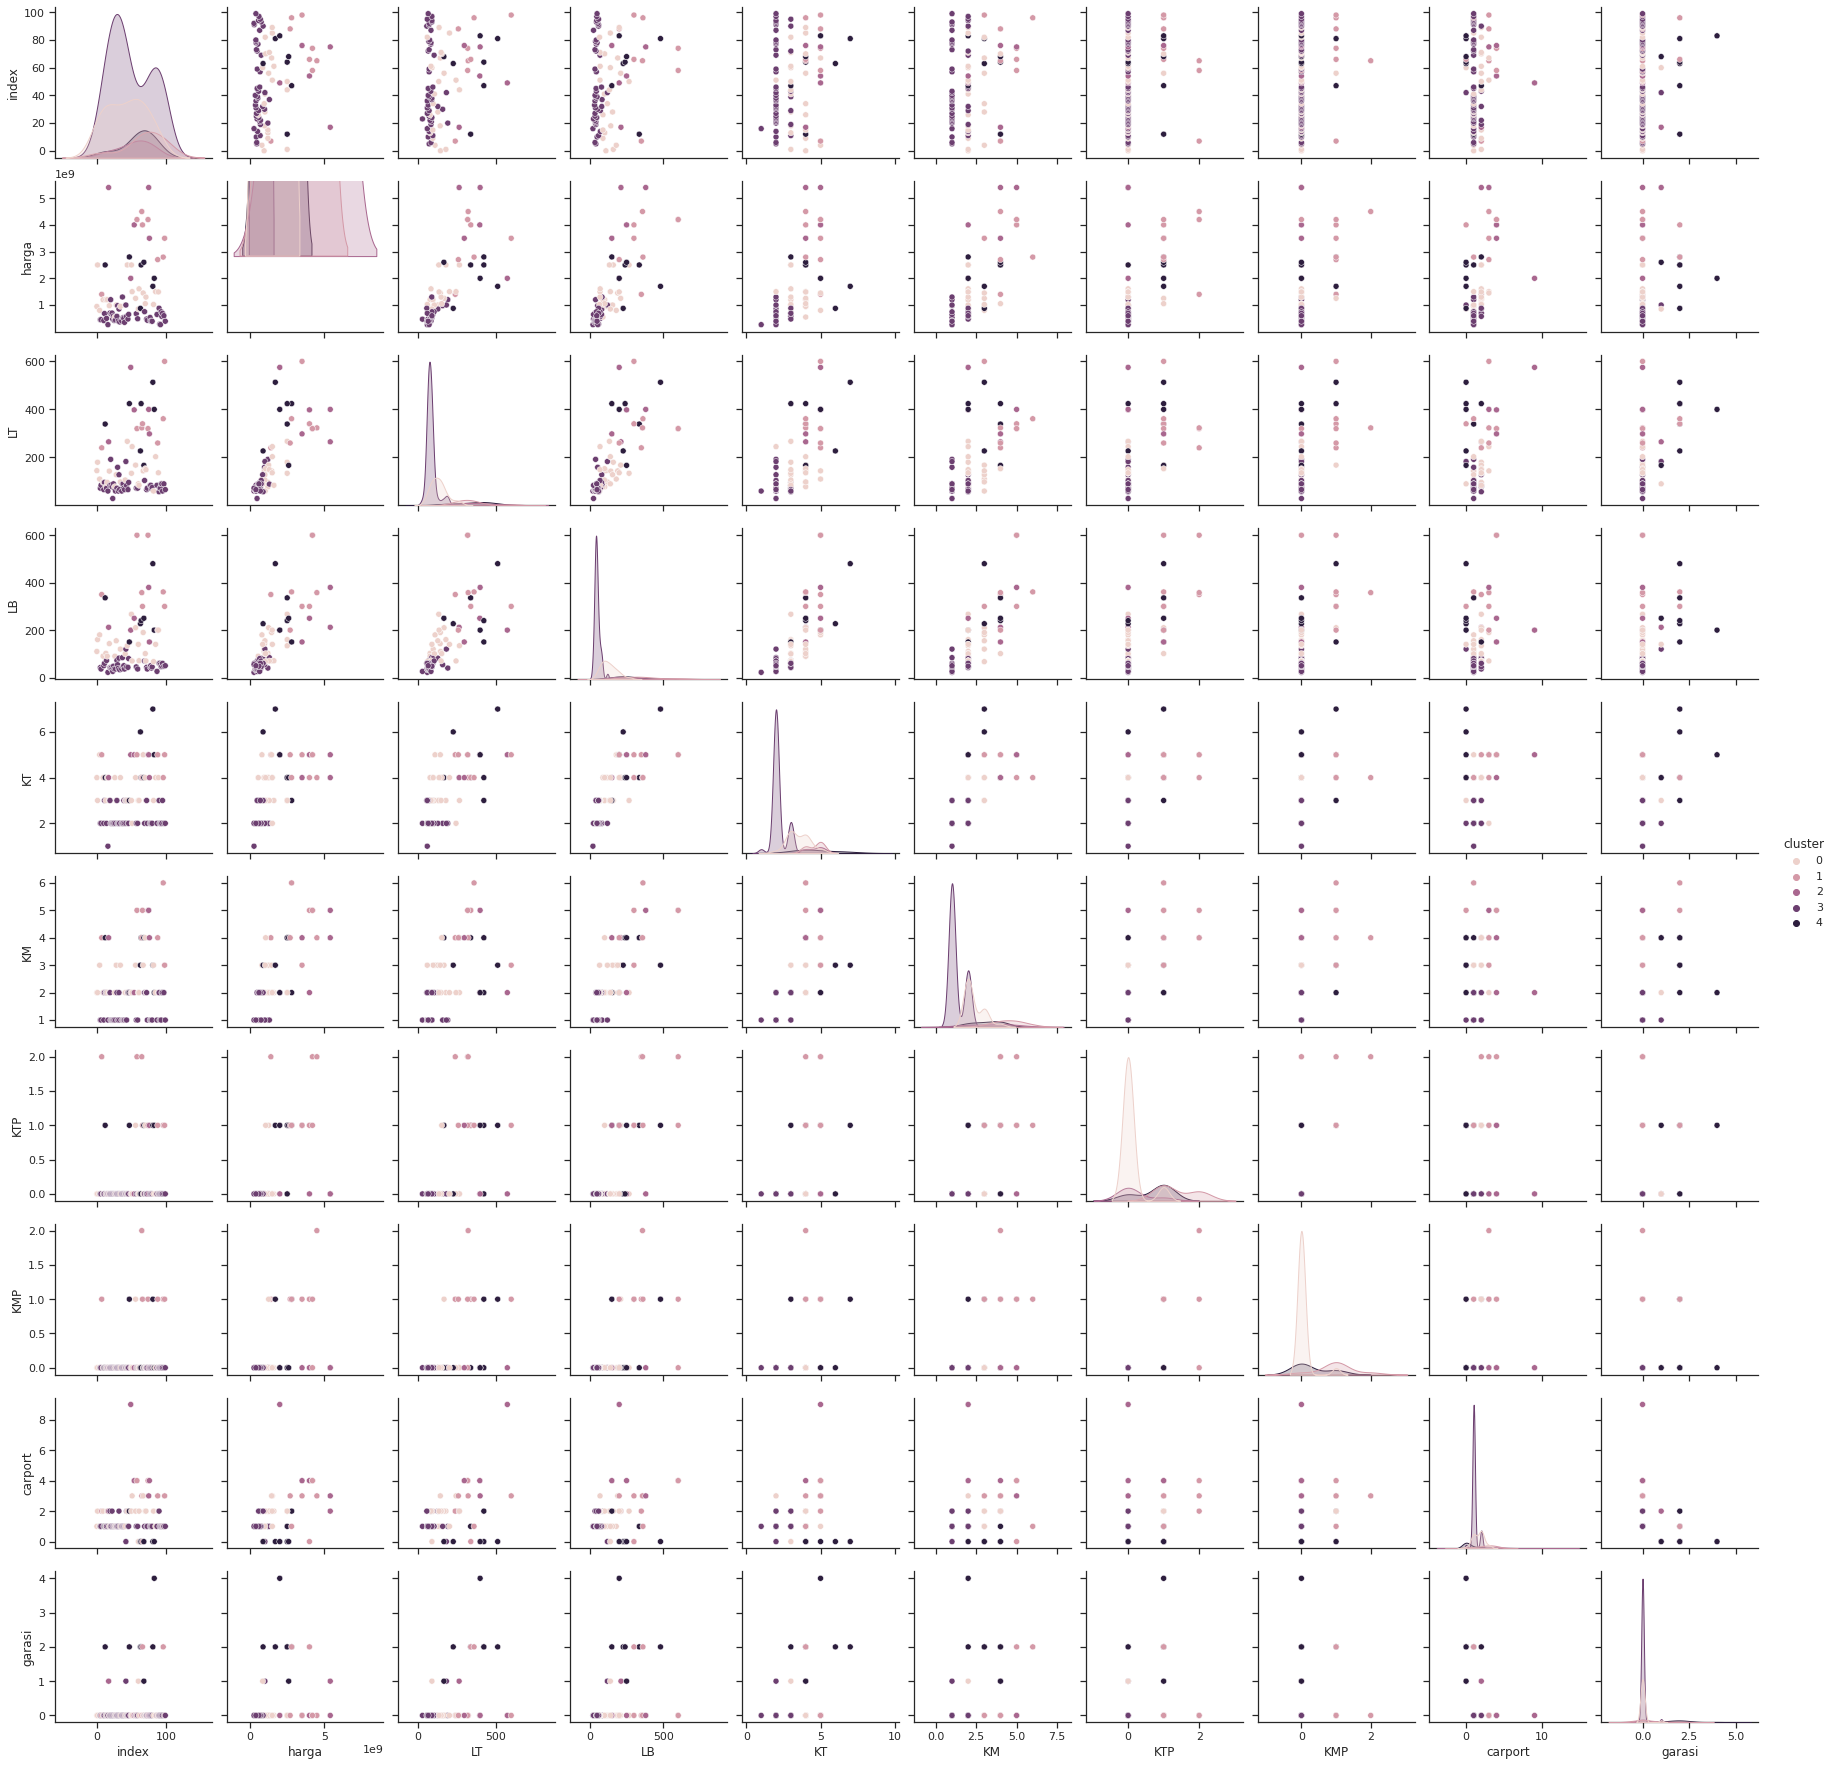

In [61]:
sns.pairplot(rumah2,hue='cluster');

# Rekomendasi Tindakan


1. Apabila ingin membeli rumah dengan fasilitas yang relatif lengkap dengan harga yang tidak tinggi, direkomendasikan rumah pada cluster 4.

2. Apabila memiliki budget yang relatif rendah, direkomendasikan rumah pada cluster 3 dan 0. Tetapi, dengan selisih harga yang tidak terlalu jauh, cluster 0 mendapatkan fasilitas yang lebih baik khususnya pada jumlah kamar tidur dan carport.

3. Apabila dibutuhkan rumah untuk orang banyak, direkomendasikan rumah pada cluster 1 karena memiliki jumlah kamar tidur dan kamar mandi yang relatif lebih banyak.

4. Apabila dibutuhkan rumah dengan lahan yang luas, direkomendasikan rumah pada cluster 2.